<a href="https://colab.research.google.com/github/Zzang-yeah/programmers_kdt_II/blob/week4/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis
탐색적 데이터 분석을 통해 데이터를 통달해봅시다. with Titanic Data
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

##0.라이브러리 준비

In [1]:
##라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
##동일 경로에 "train.csv"가 있다면 데이터 불러오기
titanic_df=pd.read_csv("./train.csv")

##1.분석의 목적과 변수 확인
* 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [3]:
##상위 5개 데이터 확인하기
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
##각 Column의 데이터 타입 확인
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##2. 데이터 전체적으로 살펴보기

In [5]:
##데이터 전체 정보를 얻는 함수 : .describe()
titanic_df.describe() #수치형 데이터에 대한 요약만을 제공->name, sex, ticket, cabin, embarked는 제공 x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
##상관계수 확인
titanic_df.corr()
#상관성(Correlation)!=인과성(Causation)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
##결측치 확인
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
##결측치 확인
titanic_df.isnull().sum()
#Age, cabin, embarked에서 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#3. 데이터의 개별 속성 파악하기

##1.Survived Column

In [10]:
##생존자, 사망자 명수는?
titanic_df['Survived'].sum()
#survived : 0(사망)/1(생존) 이라는 데이터 특징을 가지고 있기 때문에 sum을 하면 생존자의 명수가 나올것

342

In [11]:
##생존자, 사망자 명수는?
titanic_df['Survived'].value_counts()
#survived : 0(사망)/1(생존) 이라는 데이터 특징을 가지고 있기 때문에 sum을 하면 생존자의 명수가 나올것

0    549
1    342
Name: Survived, dtype: int64

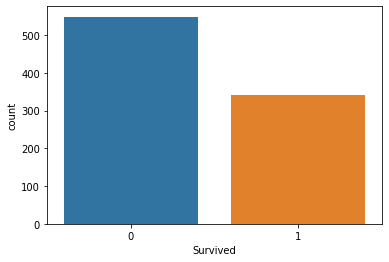

In [12]:
##생존자 수와 사망자 수의 Barplot으로 그려보기 sns.countplot()
sns.countplot(x='Survived', data=titanic_df)
#타이타닉 데이터 프레임 데이터에서 survived를 카테고리별로 나눠서 카운트해줭

##2.Pclass

In [14]:
#pclass에 따른 인원 파악
titanic_df[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [15]:
#pclass에 따른 인원 파악
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()
#Pclass를 기준으로 groupby해줌 survived와 상관없이 pclass별로 나눠줌

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()
#아까 본 것처럼 survived에서 생존하면 1이기때문에 pclass별로 sum하면 생존한 사람만 나올 것

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
#생존 비율(생존(=sum, =생존(1)/전체(=count, =생존(1)+사망(0)))
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

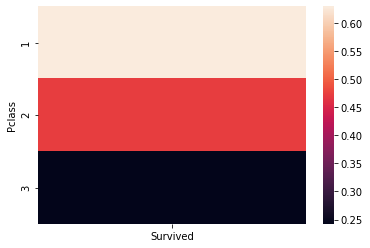

In [18]:
#히트맵 활용
sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()
#어두운 곳은 생존비율이 낮고 밝은 곳은 생존비율이 높음

##3. Sex

In [20]:
titanic_df[['Sex','Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [21]:
titanic_df.groupby(["Survived",'Sex']).count()

PassengerId  Pclass  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Survived Sex                                     ...                               
0        female           81      81    81   64  ...      81    81      6        81
         male            468     468   468  360  ...     468   468     62       468
1        female          233     233   233  197  ...     233   233     91       231
         male            109     109   109   93  ...     109   109     45       109

[4 rows x 10 columns]

In [22]:
titanic_df.groupby(["Survived",'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

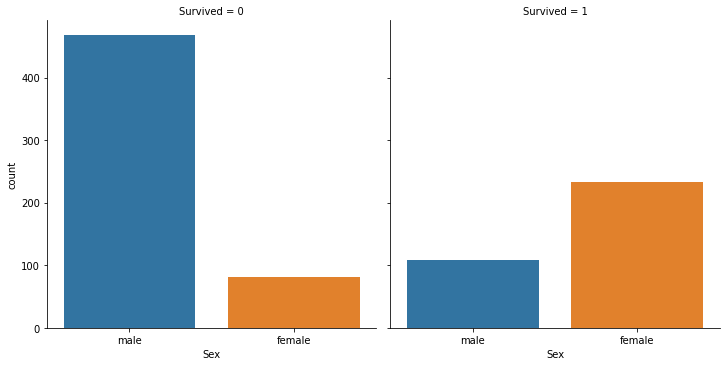

In [23]:
#sns.catplot
sns.catplot(x='Sex',col='Survived', kind='count', data=titanic_df)
plt.show()

##4. Age
Remind : 결측치가 존재했었음

In [24]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
titanic_df[titanic_df.Survived==1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

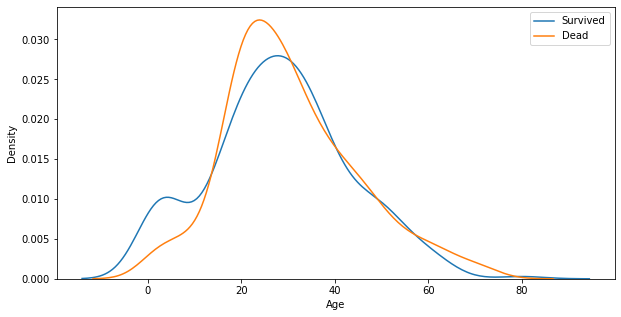

In [30]:
##Survived 1, 0과 age의 경향성
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'],ax=ax)

plt.legend(['Survived','Dead'])
plt.show()

##Appendix 1. Sex+Pclass vs Survived

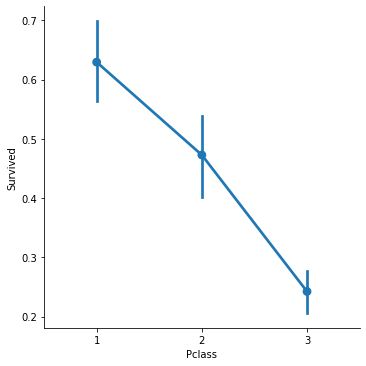

In [31]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=titanic_df)
plt.show()

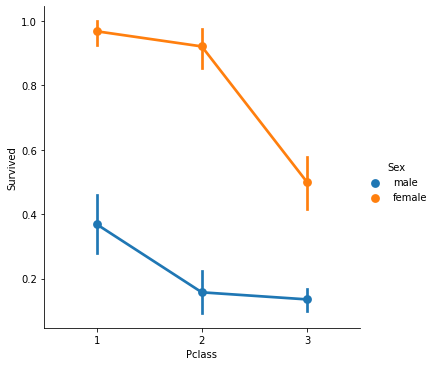

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=titanic_df)
plt.show()

##Appendix2. Age+Pclass

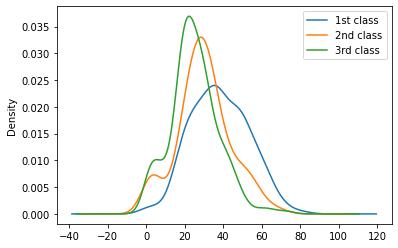

In [33]:
##Age graph with Pclass
titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

#Mission : It's Your Turn!

##1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

###fare : 요금에 따라 차이존재?




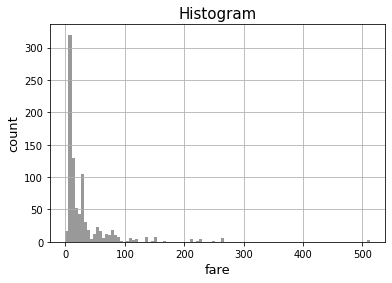

17 0.0 /320 5.123292 /129 10.246584 /53 15.369876000000001 /43 20.493168 /104 25.61646 /31 30.739752000000003 /19 35.863044 /4 40.986336 /12 46.109628 /

23 51.23292 /16 56.356212 /6 61.479504000000006 /12 66.602796 /10 71.726088 /19 76.84938 /10 81.972672 /8 87.09596400000001 /2 92.219256 /0 97.34254800000001 /

2 102.46584 /6 107.589132 /3 112.712424 /4 117.835716 /0 122.95900800000001 /0 128.0823 /7 133.205592 /0 138.32888400000002 /2 143.452176 /7 148.575468 /

0 153.69876 /0 158.822052 /2 163.945344 /0 169.068636 /0 174.19192800000002 /0 179.31522 /0 184.438512 /0 189.561804 /0 194.68509600000002 /0 199.808388 /

0 204.93168 /4 210.05497200000002 /0 215.178264 /1 220.301556 /4 225.424848 /0 230.54814000000002 /0 235.671432 /0 240.794724 /2 245.91801600000002 /0 251.04130800000001 /

0 256.1646 /6 261.287892 /0 266.411184 /0 271.534476 /0 276.65776800000003 /0 281.78106 /0 286.904352 /0 292.027644 /0 297.150936 /0 302.274228 /

0 307.39752 /0 312.52081200000003 /0 317.644104 /0 322

In [45]:
#이상치 제거하기 위해 그래프그려보기
plt.title("Histogram", fontsize=15)
frq, bins, fig = plt.hist(titanic_df["Fare"], bins=100, alpha=.8, color='grey')
plt.ylabel("count", fontsize=13)
plt.xlabel("fare", fontsize=13)
plt.grid()
plt.show()
for i in range(len(frq)//10):
  for j in range(10):
    print(int(frq[10*i+j]),bins[10*i+j],'/', end='')
  print('\n')
#print("빈도 array :", frq)
#print("구간 array :", bins)

In [47]:
#~261.287892까지만 데이터 살리고 나머지는 버리기
titanic_df_Fare=titanic_df[titanic_df['Fare']<265]
titanic_df_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
#10단위로 묶기
titanic_df_Fare_group=titanic_df_Fare['Fare']//10
titanic_df_Surv=titanic_df_Fare['Survived']
titanic_df_Fare_group

0      0.0
1      7.0
2      0.0
3      5.0
4      0.0
      ... 
886    1.0
887    3.0
888    2.0
889    3.0
890    0.0
Name: Fare, Length: 888, dtype: float64

In [57]:
titanic_df_Surv

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 888, dtype: int64

In [59]:
titanic_df_Fare_Surv=pd.concat([titanic_df_Fare_group, titanic_df_Surv], axis=1)
titanic_df_Fare_Surv

,Fare,Survived
0,0.0,0
1,7.0,1
2,0.0,1
3,5.0,1
4,0.0,0
...,...,...
886,1.0,0
887,3.0,1
888,2.0,0
889,3.0,1


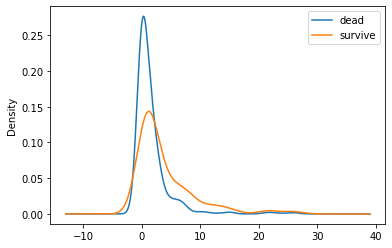

In [60]:
##Age graph with Pclass
titanic_df_Fare_Surv['Fare'][titanic_df_Fare_Surv.Survived==0].plot(kind='kde')
titanic_df_Fare_Surv['Fare'][titanic_df_Fare_Surv.Survived==1].plot(kind='kde')

plt.legend(['dead','survive'])
plt.show()

[]

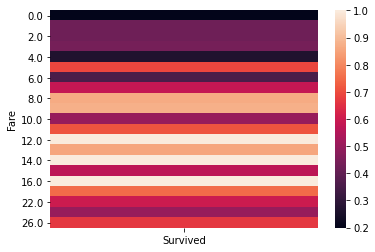

In [61]:
#히트맵 활용
sns.heatmap(titanic_df_Fare_Surv[['Fare','Survived']].groupby(['Fare']).mean())
plt.plot()
#어두운 곳은 생존비율이 낮고 밝은 곳은 생존비율이 높음